In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [2]:
df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
categorical_data =  df.select_dtypes(exclude=[np.number])

In [6]:
categorical_data

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [7]:
categorical_data.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [8]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [9]:
category_values = []
for column in categorical_data.columns:
    values = df[column].unique()
    category_values.append({column:values})

category_values    

[{'cut': array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)},
 {'color': array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)},
 {'clarity': array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
        dtype=object)}]

In [12]:
clarity_mapping ={'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}

In [15]:
df = df.drop('Unnamed: 0',axis=1)

In [16]:
cut_mapping = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
df['cut'] = df['cut'].replace(cut_mapping)

/tmp/ipykernel_33/1407002513.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cut'] = df['cut'].replace(cut_mapping)


In [17]:
color_mapping={'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
df['color']=df['color'].replace(color_mapping)

/tmp/ipykernel_33/3913842956.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['color']=df['color'].replace(color_mapping)


In [18]:
clarity_mapping ={'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
df['clarity'] = df['clarity'].replace(clarity_mapping)

/tmp/ipykernel_33/112305175.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clarity'] = df['clarity'].replace(clarity_mapping)


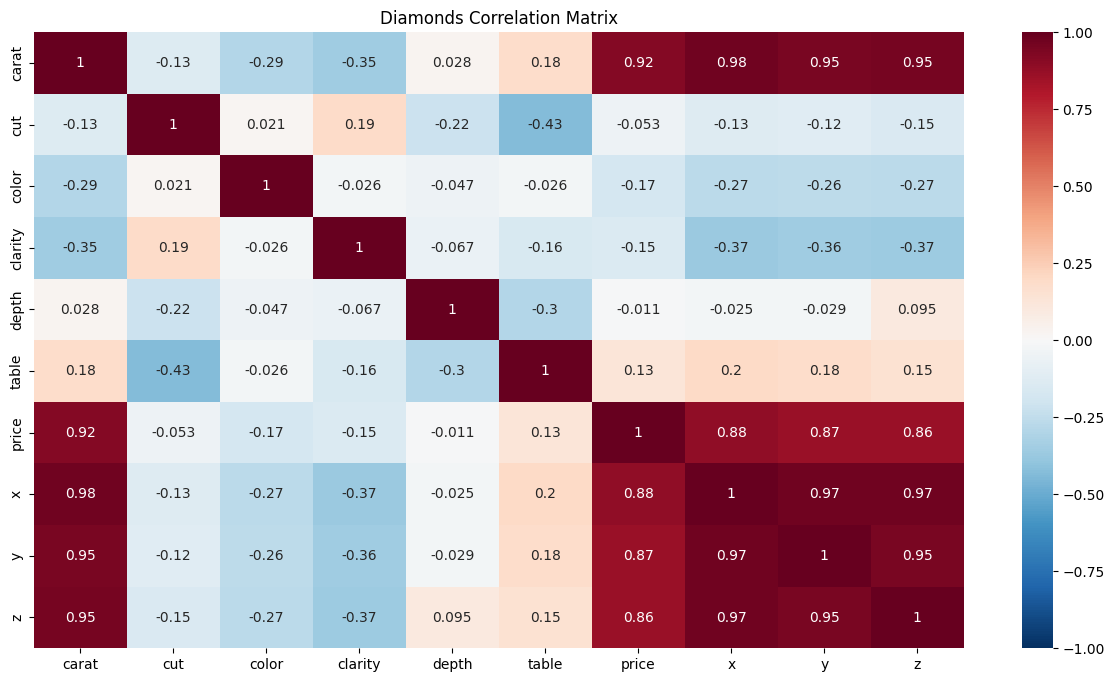

In [19]:
import matplotlib.pyplot as plt
# Copy the DataFrame to a new DataFrame for plotting correlation matrix
df_corr = df.copy()


# Create a correlation matrix
corr = df_corr.corr()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Diamonds Correlation Matrix')
plt.show()

In [20]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [21]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=80)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
dt_param_grid = {
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}


dt_regressor = DecisionTreeRegressor()
svm_regressor = SVR()
kf = KFold(n_splits=3, shuffle=True, random_state=42)

dt_grid_search = GridSearchCV(dt_regressor, param_grid=dt_param_grid,cv=kf,scoring='neg_mean_squared_error',return_train_score=True)
svm_grid_search = GridSearchCV(svm_regressor, param_grid=svm_param_grid,cv=kf,scoring='neg_mean_squared_error',return_train_score=True)


dt_grid_search.fit(X_train, y_train)
svm_grid_search.fit(X_train[:10000], y_train[:10000])


print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Best Score:", dt_grid_search.best_score_)
print("SVM Best Parameters:", svm_grid_search.best_params_)
print("SVM Best Score:", svm_grid_search.best_score_)

Decision Tree Best Parameters: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 5}
Decision Tree Best Score: -496544.51793216384
SVM Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
SVM Best Score: -2052087.8896020763


In [30]:
dt_train_loss = np.sqrt(-dt_grid_search.cv_results_['mean_train_score'])  
dt_val_loss = np.sqrt(-dt_grid_search.cv_results_['mean_test_score'])   

svm_train_loss = np.sqrt(-svm_grid_search.cv_results_['mean_train_score']) 
svm_val_loss = np.sqrt(-svm_grid_search.cv_results_['mean_test_score'])   

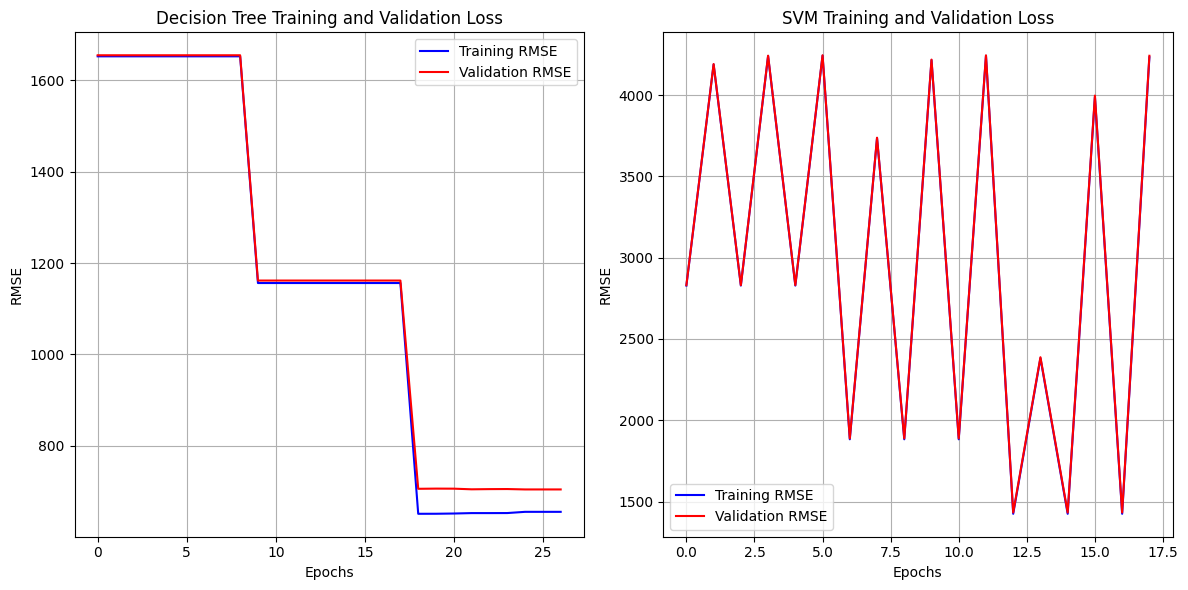

In [31]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(dt_train_loss, label='Training RMSE', color='blue')
plt.plot(dt_val_loss, label='Validation RMSE', color='red')
plt.title('Decision Tree Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(svm_train_loss, label='Training RMSE', color='blue')
plt.plot(svm_val_loss, label='Validation RMSE', color='red')
plt.title('SVM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [32]:
best_dt = dt_grid_search.best_estimator_
best_svm = svm_grid_search.best_estimator_

In [33]:
dt_prediction = best_dt.predict(X_test)
svm_prediction =  best_svm.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error

dt_rmse = np.sqrt(mean_squared_error(dt_prediction,y_test))
svm_rmse = np.sqrt(mean_squared_error(svm_prediction,y_test))

In [35]:
print(f"Test Score for dt {dt_rmse}")
print(f"Test Score for svm {svm_rmse}")

Test Score for dt 716.4150214377262
Test Score for svm 1402.3092532040516
